In [1]:
import pint.toa as toa
import pint.models as models
import matplotlib.pyplot as plt
import pint.residuals as res
import astropy.units as u
import astropy.constants as c
from pint.fitter import WlsFitter as wls
import pint
import numpy as np
import astropy as ast

In [2]:
%matplotlib inline

In [3]:
tim ='PINT/tests/datafile/J0613-0200_NANOGrav_dfg+12.tim'
par = 'PINT/tests/datafile/J0613-0200_NANOGrav_dfg+12_TAI_FB90.par'

In [4]:
t = toa.get_TOAs(timfile=tim,ephem='DE405')

INFO: Applying clock corrections. [pint.toa]
INFO: Observatory gbt, loading clock file /Users/nearclouding/.local/lib/python3.6/site-packages/pint-0.5.2+202.g75af026.dirty-py3.6-macosx-10.7-x86_64.egg/pint/datafiles/time.dat [pint.observatory.topo_obs]
INFO: Observatory gbt, loading GPS clock file /Users/nearclouding/.local/lib/python3.6/site-packages/pint-0.5.2+202.g75af026.dirty-py3.6-macosx-10.7-x86_64.egg/pint/datafiles/gps2utc.clk [pint.observatory.topo_obs]
INFO: Observatory gbt, loading BIPM clock file /Users/nearclouding/.local/lib/python3.6/site-packages/pint-0.5.2+202.g75af026.dirty-py3.6-macosx-10.7-x86_64.egg/pint/datafiles/tai2tt_bipm2015.clk [pint.observatory.topo_obs]
INFO: Getting IERS params and computing TDBs. [pint.toa]
INFO: Computing TDB columns. [pint.toa]
INFO: Computing observatory positions and velocities. [pint.toa]
INFO: Compute positions and velocities of observatories and Earth (planets = False), using DE405 ephemeris [pint.toa]
INFO: Adding columns ssb_obs

In [5]:
m = models.get_model(par)

In [6]:
#m.components

In [7]:
#m.DelayComponent_list # models for delay

In [8]:
#m.PhaseComponent_list # models for phase

In [9]:
astro=m.delay_funcs[0](t.table)
jump=m.delay_funcs[1](t.table)
shapiro=m.delay_funcs[2](t.table)
dmdelay=m.delay_funcs[3](t.table)
binary=m.delay_funcs[4](t.table,None)
spindown=m.phase(t.table)

In [10]:
#plt.plot(t.get_mjds(),dmdelay,"g.")
#plt.show()
#plt.plot(t.get_mjds(),jump,"r.")
#plt.show()
#plt.plot(t.get_mjds(),astro,'b.')
#plt.show()
#plt.plot(t.get_mjds(),shapiro,'y.')
#plt.show()
#plt.plot(t.get_mjds(),binary,'g.')

In [11]:
r=res.resids(t,m)

In [12]:
RES=r.time_resids

In [18]:
ress=pint.models.GravitationalWave.continuous_gw(t,m, gwtheta=0.75,gwphi=0.75,mc=10**9, dist=400,fgw=10**(-9),phase0=.75,psi=0.75, inc=0.75)

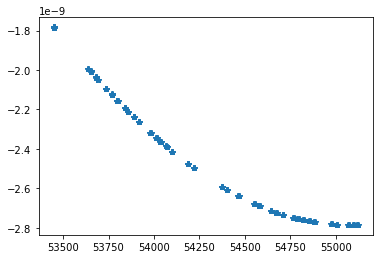

In [19]:
plt.plot(t.get_mjds(),ress,"*")